# Import the Dependencies

In [56]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

# Loading the Dataset

In [57]:
df = pd.read_csv("blinkit_data.csv")

# Understanding the data

In [58]:

df.columns

Index(['Item Fat Content', 'Item Identifier', 'Item Type',
       'Outlet Establishment Year', 'Outlet Identifier',
       'Outlet Location Type', 'Outlet Size', 'Outlet Type', 'Item Visibility',
       'Item Weight', 'Sales', 'Rating'],
      dtype='object')

In [59]:
df.head()

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2010,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2000,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item Fat Content           8523 non-null   object 
 1   Item Identifier            8523 non-null   object 
 2   Item Type                  8523 non-null   object 
 3   Outlet Establishment Year  8523 non-null   int64  
 4   Outlet Identifier          8523 non-null   object 
 5   Outlet Location Type       8523 non-null   object 
 6   Outlet Size                8523 non-null   object 
 7   Outlet Type                8523 non-null   object 
 8   Item Visibility            8523 non-null   float64
 9   Item Weight                7060 non-null   float64
 10  Sales                      8523 non-null   float64
 11  Rating                     8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [61]:
df.tail()

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
8518,low fat,NCT53,Health and Hygiene,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.000000,NaN,164.5526,4.0
8519,low fat,FDN09,Snack Foods,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.034706,NaN,241.6828,4.0
8520,low fat,DRE13,Soft Drinks,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.027571,NaN,86.6198,4.0
8521,reg,FDT50,Dairy,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.107715,NaN,97.8752,4.0
8522,reg,FDM58,Snack Foods,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.000000,NaN,112.2544,4.0


# Observation

Item Fat Content – Indicates whether the product is Regular or Low Fat.

Item Identifier – Unique code for each product.

Item Type – Category of the product (e.g., Fruits, Frozen Foods).

Outlet Establishment Year – Year the store was opened.

Outlet Identifier – Unique code for each store/outlet.

Outlet Location Type – Tier of the outlet location (Tier 1/2/3).

Outlet Size – Size of the store (Small, Medium, High).

Outlet Type – Type/format of the store (Supermarket Type1/2…).

Item Visibility – Proportion of shelf space allocated to the product.

Item Weight – Weight of the product.

Sales – Total sales amount for the product.

Rating – Product rating on a 1–5 scale.

# Data Cleaning

In [62]:
df['Item Fat Content'] = df['Item Fat Content'].replace({'LF': 'Low Fat', 'low fat': 'Low Fat', 'reg': 'Regular'})
df['Item Fat Content'].unique()

array(['Regular', 'Low Fat'], dtype=object)

In [63]:
df=df.drop(columns=['Item Visibility','Item Weight'])

In [64]:
df['Sales']=df['Sales'].round(1)

# Featuring Engineering

In [65]:
df = df.rename(columns={
    'Item Fat Content': 'item_fat',
    'Item Identifier': 'item_id',
    'Item Type': 'item_type',
    'Outlet Establishment Year': 'store_year',
    'Outlet Identifier': 'store_id',
    'Outlet Location Type': 'store_loc',
    'Outlet Size': 'store_size',
    'Outlet Type': 'store_type',
    'Sales': 'sales',
    'Rating': 'rating'
})
df

,item_fat,item_id,item_type,store_year,store_id,store_loc,store_size,store_type,sales,rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,145.5,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,115.3,5.0
2,Regular,FDR28,Frozen Foods,2010,OUT046,Tier 1,Small,Supermarket Type1,165.0,5.0
3,Regular,FDL50,Canned,2000,OUT013,Tier 3,High,Supermarket Type1,126.5,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,55.2,5.0
...,...,...,...,...,...,...,...,...,...,...
8518,Low Fat,NCT53,Health and Hygiene,1998,OUT027,Tier 3,Medium,Supermarket Type3,164.6,4.0
8519,Low Fat,FDN09,Snack Foods,1998,OUT027,Tier 3,Medium,Supermarket Type3,241.7,4.0
8520,Low Fat,DRE13,Soft Drinks,1998,OUT027,Tier 3,Medium,Supermarket Type3,86.6,4.0
8521,Regular,FDT50,Dairy,1998,OUT027,Tier 3,Medium,Supermarket Type3,97.9,4.0


In [66]:
df['store_age'] = 2025 - df['store_year']

# Data Analysis

What is the total sales in the dataset?

In [67]:
df['sales'].sum()

np.float64(1201685.6)

What is the average sales per product?

In [68]:
df['sales'].mean()

np.float64(140.99326528217765)

Which item_type has the highest

In [69]:
df.groupby('item_type')['sales'].sum().idxmax()

'Fruits and Vegetables'

Which item_type has the Lowest

In [70]:
df.groupby('item_type')['sales'].sum().idxmin()

'Seafood'


How does item_fat affect sales?


In [71]:
df.groupby('item_fat')['sales'].mean()

item_fat
Low Fat    140.713884
Regular    141.506021
Name: sales, dtype: float64

Total sales per location

In [72]:
df.groupby('store_loc')['sales'].sum().sort_values(ascending=False)

store_loc
Tier 3    472135.1
Tier 2    393151.5
Tier 1    336399.0
Name: sales, dtype: float64

Stores in each location

In [96]:
df.groupby('store_loc')[['store_id']].nunique()

,store_id
store_loc,
Tier 1,3
Tier 2,3
Tier 3,4


What is the average sales per outlet type?

In [74]:
df.groupby('store_type')['sales'].mean()

store_type
Grocery Store        140.296676
Supermarket Type1    141.214219
Supermarket Type2    141.678448
Supermarket Type3    139.802139
Name: sales, dtype: float64

1.How are sales distributed across all store location

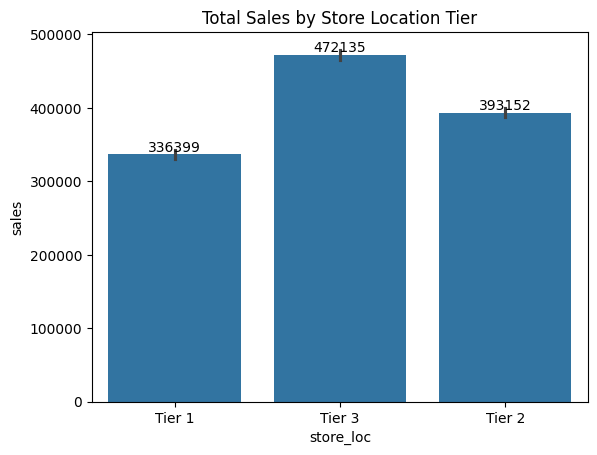

In [75]:
a=sns.barplot(x='store_loc', y='sales', data=df, estimator=sum) 
a.bar_label(a.containers[0])
plt.title("Total Sales by Store Location Tier")
plt.show()

plt.show()

OBSERVATION:

In Tier 3 Location most sales is happening 

2.Which item_type contributes more to the sales in tier 3 location

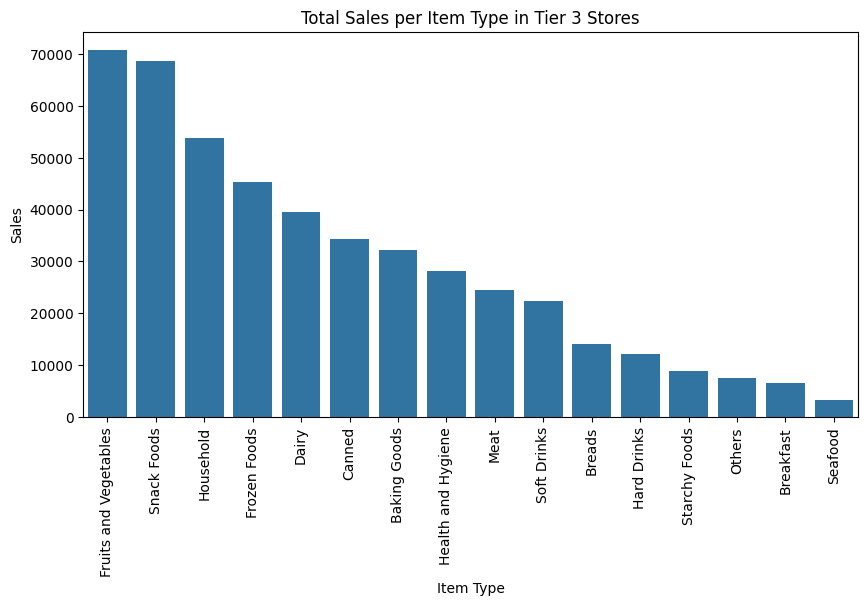

In [76]:
tier3_df = df[df['store_loc'] == 'Tier 3']
tier3_sales = tier3_df.groupby('item_type')['sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x=tier3_sales.index, y=tier3_sales.values)
plt.title("Total Sales per Item Type in Tier 3 Stores")
plt.ylabel("Sales")
plt.xlabel("Item Type")
plt.xticks(rotation=90)
plt.show()

OBSERVATION:

Fruits ,Vegeis and snack foods contribute more to the sales

3.Total sales by fat content

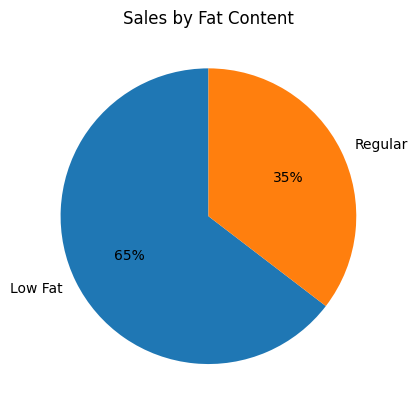

In [109]:
sales_by_fat=df.groupby('item_fat')['sales'].sum()
plt.pie(sales_by_fat,labels=sales_by_fat.index,autopct='%.0f%%',startangle=90)
plt.title('Sales by Fat Content')
plt.show()

OBSERVATION:

Low fat items contribute more to the sales..Can conclude people perfer healthy products more irrespective of price

4.Location wise which products are preffered more  wrt item fact content

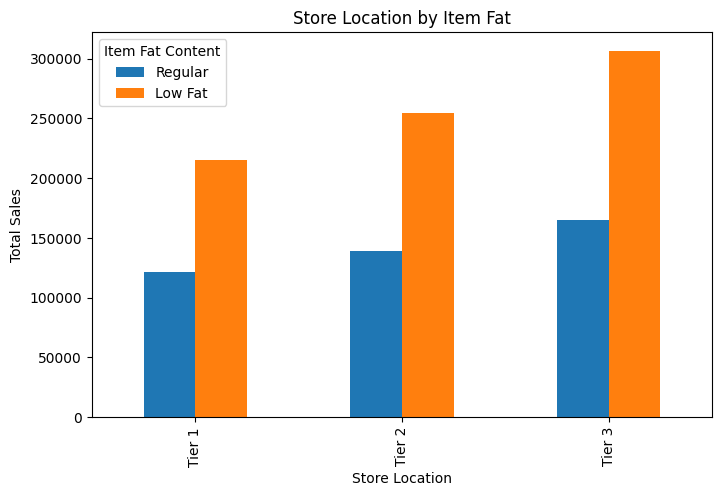

In [ ]:
grouped = df.groupby(['store_loc','item_fat'])['sales'].sum().unstack()
grouped = grouped[['Regular','Low Fat']]
ax = grouped.plot(kind='bar', figsize=(8,5), title='Store Location by Item Fat')
plt.xlabel('Store Location')
plt.ylabel('Total Sales')
plt.legend(title='Item Fat Content')
plt.show()


OBSERVATION:

In all the three locations low fat products are fast moving

5.What is the store wise Contribution to sales

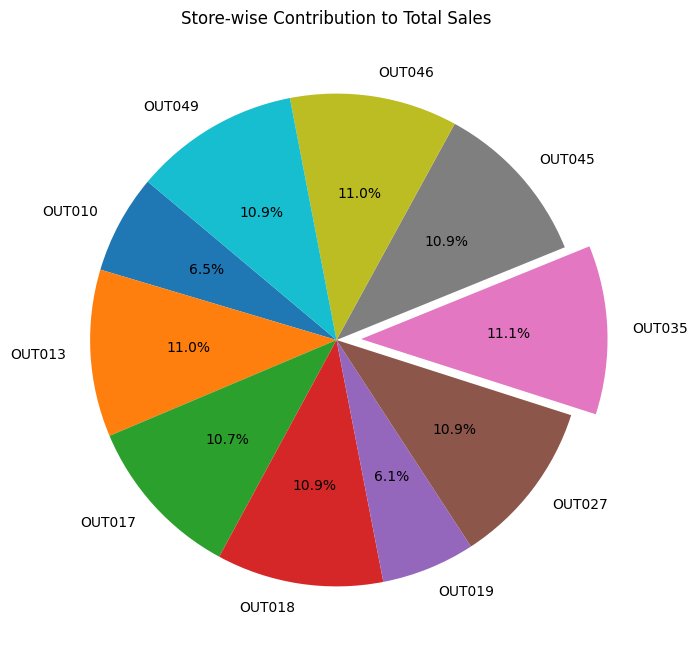

In [77]:
store_sales = df.groupby('store_id')['sales'].sum()
plt.figure(figsize=(8,8))
plt.pie(
    store_sales,
    labels=store_sales.index,
    autopct='%1.1f%%',
    startangle=140,
    explode=[0,0,0,0,0,0,0.1,0,0,0]
)
plt.title("Store-wise Contribution to Total Sales")
plt.show()

OBSERVATION:

Store35 contributes the most and is in leading ...Store10 and Store19 contributes less compared to other stores

6.which size stores contributes more to the sales

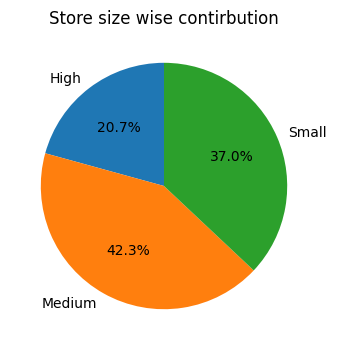

In [116]:
sales_by_size=df.groupby('store_size')['sales'].sum()
plt.figure(figsize=(4,4))
plt.pie(sales_by_size,labels=sales_by_size.index,autopct='%1.1f%%',startangle=90)
plt.title('Store size wise contirbution')
plt.show()

OBSERVATION:

Medium size stores contributes more ..acc to prev analysis high size store count is less that mayb the reason

There is no huge difference b/w small size and medium size 

7.What is the age of each store

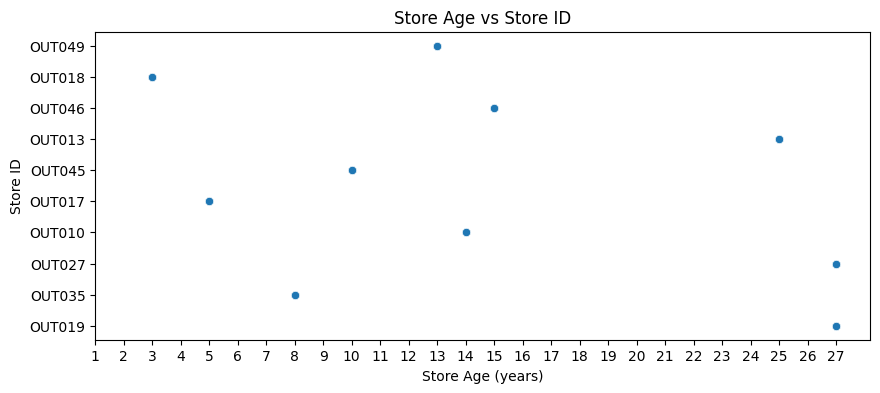

In [123]:
plt.figure(figsize=(10,4))
sns.scatterplot(
    data=df,
    x='store_age',
    y='store_id',
)
plt.xticks(range(1,28))
plt.title("Store Age vs Store ID")
plt.xlabel("Store Age (years)")
plt.ylabel("Store ID")
plt.show()


OBSERVATION:

Store19 and 27 are the oldest and store18 is the new one 

Store35 is 8 years old yet leads in the contribution 

8.Average rating per store

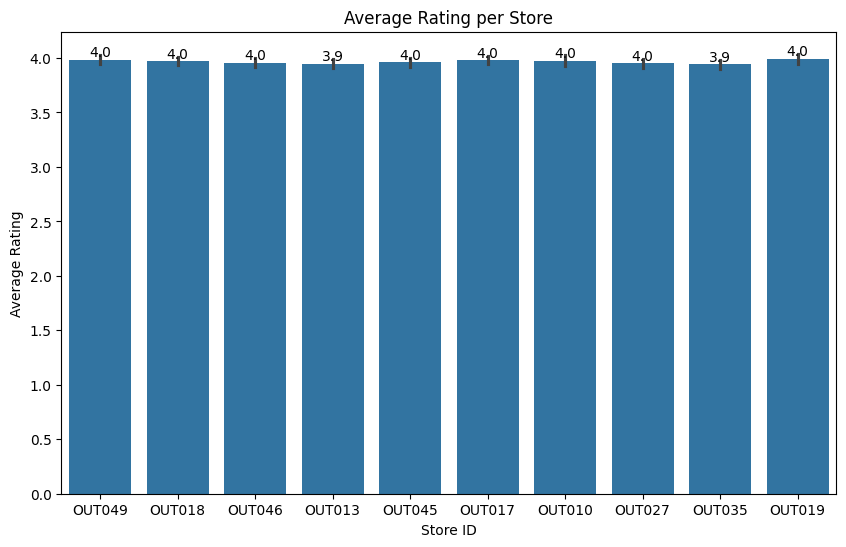

In [105]:
plt.figure(figsize=(10,6))
a=sns.barplot(
    data=df,
    x='store_id',
    y='rating')
for i in a.containers:
    a.bar_label(i, fmt='%.1f')
plt.title("Average Rating per Store")
plt.xlabel("Store ID")
plt.ylabel("Average Rating")
plt.show()

OBSERVATION:

Almost all the stores have good rating irrespective of the age of the store

# Conclusion

From the above analysis we can conclude that :

1.Focusing on top products and best-performing stores can improve revenue.

2.People perfer Fruits vegeies and snack items the most wherein seafood breakfast is not mostly prefered

3.Store characteristics like type, size, and location affect sales.

4.low fat contained products can be stocked more the regular ones

5.Store age and its performance is not related to each other


